In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

df = pd.read_csv('cleaned_data.csv')
cf = pd.read_csv('top10_data.csv')
df.head()

,date,country,continent,confirmed_cases,deaths,recovered,tests_done,vaccinations
0,2020-12-13 09:00:00,USA,North America,491582.0,12213.0,45832.0,888848.000000,412233.000000
1,2020-07-02 12:00:00,Brazil,South America,449840.0,1943.0,72622.0,508584.088742,126948.000000
2,2020-02-09 11:00:00,Germany,Europe,427485.0,6905.0,390670.0,136830.000000,672999.000000
3,2020-01-22 04:00:00,Russia,Europe,339252.0,16053.0,300459.0,173875.000000,858869.000000
4,2021-01-07 01:00:00,UK,Europe,228273.0,440.0,42711.0,233865.000000,497636.159014


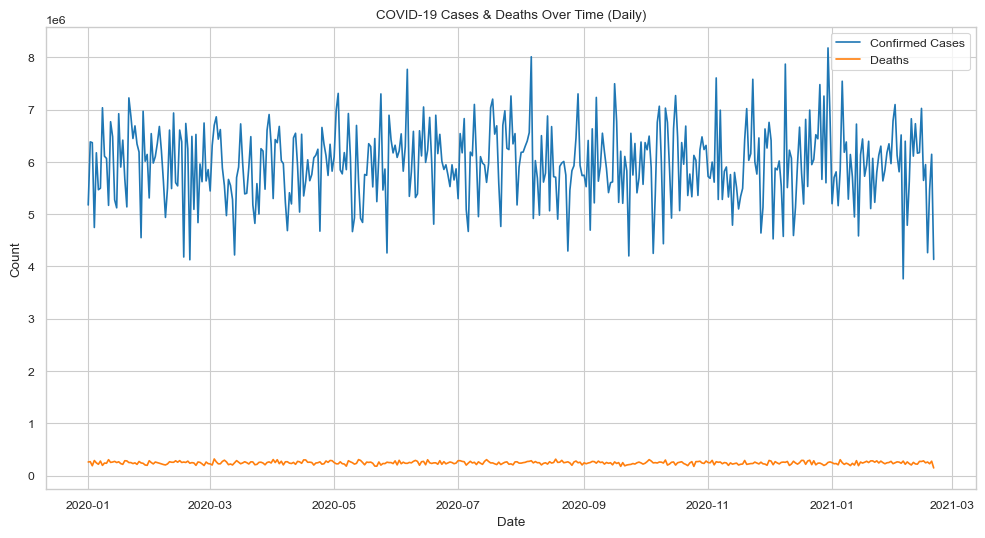

In [116]:
# cases & death 
df['date'] = pd.to_datetime(df['date'])

daily_df = df.resample('D', on='date').sum().reset_index() # Making new dataframe based on daily cases
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_df, x='date', y='confirmed_cases', label='Confirmed Cases')
sns.lineplot(data=daily_df, x='date', y='deaths', label='Deaths')
plt.title("COVID-19 Cases & Deaths Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.savefig('caseVSdeath.png', dpi=300, bbox_inches='tight')
plt.show()



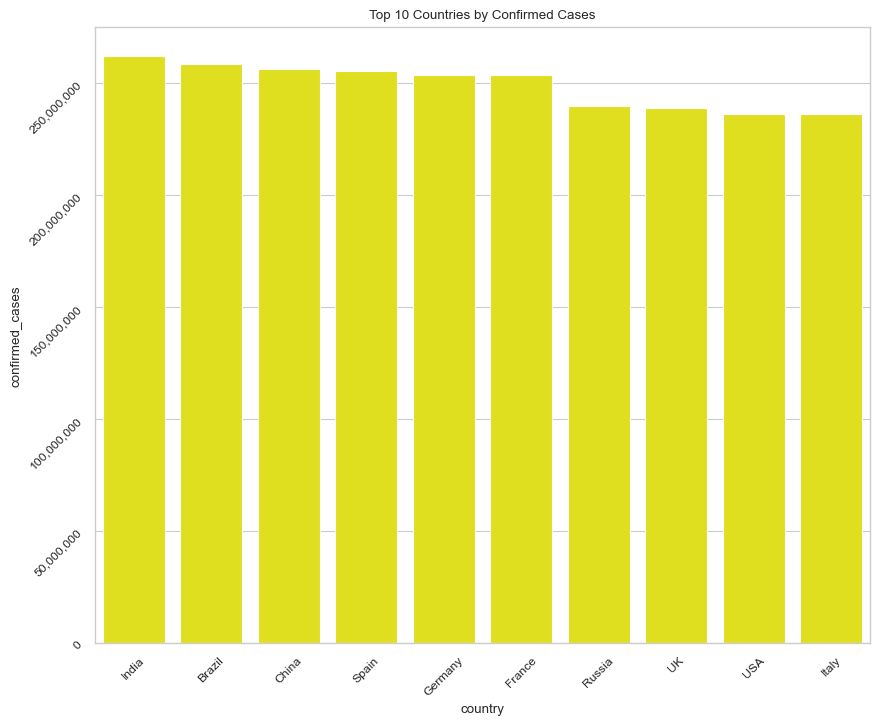

In [118]:
# Bar plot of top 10 countries
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(data=cf, x='country', y='confirmed_cases', color='yellow')
plt.title("Top 10 Countries by Confirmed Cases")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.savefig('Top10Countries.png', dpi=500, bbox_inches='tight')
plt.show()

       continent  confirmed_cases
0           Asia     5.180270e+08
1         Europe     1.476311e+09
2  North America     2.361360e+08
3  South America     2.580839e+08


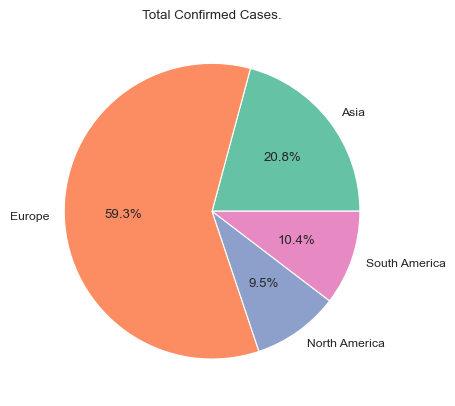

In [119]:
# Pie chart shares of cases by continent

cf = df.groupby('continent')['confirmed_cases'].sum().reset_index()

print(cf)
plt.pie(cf['confirmed_cases'], labels=cf['continent'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Total Confirmed Cases.")
plt.savefig('totalConfirmed.png', dpi=800, bbox_inches='tight')
plt.show()

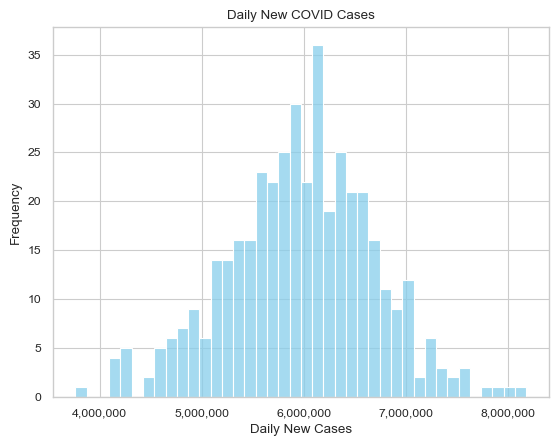

In [120]:
# Histogram distribution of daily new cases
sns.histplot(data=daily_df, x='confirmed_cases', bins=40, color='skyblue')
plt.xlabel('Daily New Cases')
plt.ylabel('Frequency')
plt.title('Daily New COVID Cases')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.savefig('dailynewcovidcase.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Highest day spike in cases

max_cases = df['confirmed_cases'].idxmax()
max_data = df.loc[max_cases]



,date,country,continent,confirmed_cases,deaths,recovered,tests_done,vaccinations
0,2020-12-13 09:00:00,USA,North America,491582.0,12213.0,45832.0,888848.000000,412233.000000
1,2020-07-02 12:00:00,Brazil,South America,449840.0,1943.0,72622.0,508584.088742,126948.000000
2,2020-02-09 11:00:00,Germany,Europe,427485.0,6905.0,390670.0,136830.000000,672999.000000
3,2020-01-22 04:00:00,Russia,Europe,339252.0,16053.0,300459.0,173875.000000,858869.000000
4,2021-01-07 01:00:00,UK,Europe,228273.0,440.0,42711.0,233865.000000,497636.159014


In [5]:
# Country with highest vaccination rate bar chart
highest_vaccination = df.groupby('country')['vaccinations'].sum().sort_values(ascending=False).tail()

# plt.pie(highest_vaccination.values, labels=highest_vaccination.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
# plt.title("Total Confirmed Cases.")
# plt.savefig('totalconfirmedcasecontinentwise.png', dpi=300, bbox_inches='tight')
# plt.show()
highest_vaccination

country
France    4.949276e+08
UK        4.929391e+08
Italy     4.830576e+08
Brazil    4.724444e+08
Russia    4.723666e+08
Name: vaccinations, dtype: float64

In [114]:
# Case fatality rate 

total_cases = df['confirmed_cases'].sum()
total_death = df['deaths'].sum()
CFR_percentage = (total_death/total_cases) * 100 
print(CFR_percentage)


4.079855809515109
